In [359]:
# polynomial regression using gradient descent

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel('data/deg6.xlsx')
degree = 6

x_train = data['x'].values
y_train = data['y'].values

In [361]:
# create input matrix
X = np.ones((len(x_train), degree + 1))
for i in range(1, degree + 1):
    X[:, i] = x_train ** i

X.shape

(36, 7)

In [362]:
# create vector of answers
y = y_train.reshape(-1, 1)

In [363]:
# create theta vectors
theta = theta_reg = np.zeros((X.shape[1], 1))

In [364]:
a = 0.001
m = len(x_train)
iterations = range(10000)
lambda_ = 1

mse_list = []
mse_reg_list = []

for _ in iterations:
    # X @ theta are the predictions of y
    # (X @ theta - y) are the errors
    # X.T @ (X @ theta - y) sums the errors for each theta
    # (a / m) is learning rate (slow down the process)
    # theta_reg * (1 - a * lambda_ / m) is the regularization term
    
    # normal fit
    theta = theta - (a / m) * X.T @ (X @ theta - y)
    mse_total = np.sum((X @ theta - y) ** 2)
    mse_list.append(mse_total)

    # regularized fit
    theta_reg = theta_reg * (1 - a * lambda_ / m) - (a / m) * X.T @ (X @ theta - y)
    mse_reg_total = np.sum((X @ theta_reg - y) ** 2)
    mse_reg_list.append(mse_reg_total)

theta.T

array([[ 1.04973186,  0.60700842,  0.26915997, -0.02939532, -0.27405604,
        -0.33764417,  0.20312509]])

In [365]:
# print equation
print('y = %.2f' % theta[0], end='')
for i in range(1, len(theta)):
    print(' + %.2fx^%d' % (theta[i], i), end='')

y = 1.05 + 0.61x^1 + 0.27x^2 + -0.03x^3 + -0.27x^4 + -0.34x^5 + 0.20x^6

In [366]:
# print equation
print('y = %.2f' % theta_reg[0], end='')
for i in range(1, len(theta_reg)):
    print(' + %.2fx^%d' % (theta_reg[i], i), end='')

y = 0.84 + 0.48x^1 + 0.21x^2 + -0.03x^3 + -0.23x^4 + -0.28x^5 + 0.15x^6

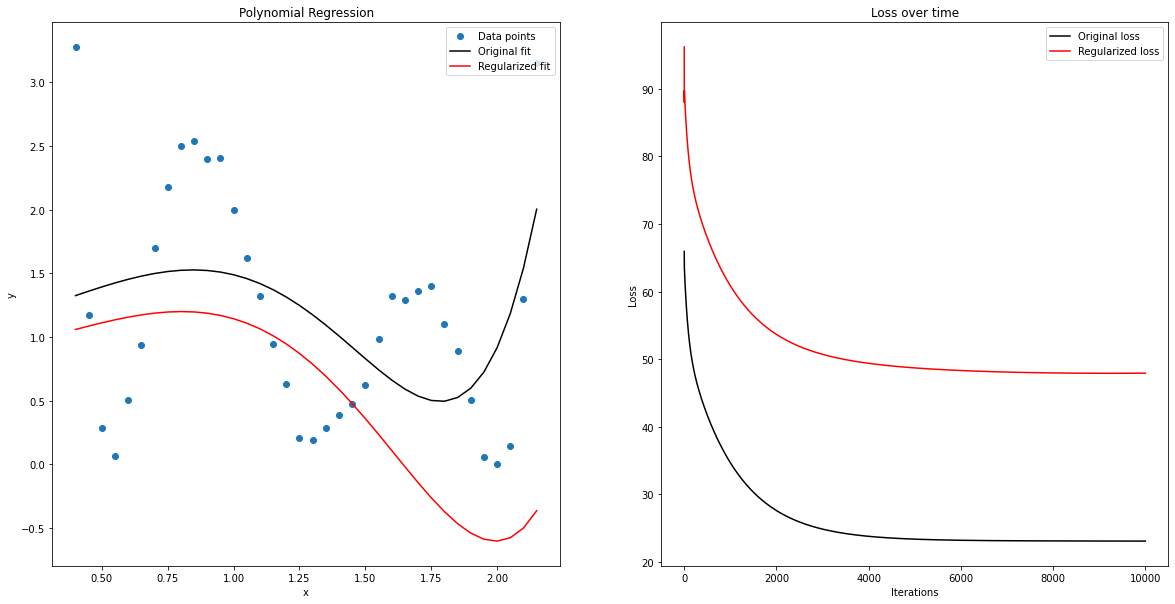

In [367]:
# plot results
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(121)
ax1.set_title('Polynomial Regression')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

y_pred = X @ theta
y_pred_reg = X @ theta_reg

ax1.plot(x_train, y_train, 'o')
ax1.plot(x_train, y_pred, 'k-')
ax1.plot(x_train, y_pred_reg, 'r-')
ax1.legend(['Data points', 'Original fit', 'Regularized fit'], loc='upper right')

# plot how the loss decreases over time
ax2 = fig.add_subplot(122)
ax2.set_title('Loss over time')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Loss')
ax2.plot(iterations, mse_list, 'k-')
ax2.plot(iterations, mse_reg_list, 'r-')
ax2.legend(['Original loss', 'Regularized loss'], loc='upper right')

plt.show()